In [1]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
from pytriqs.gf import *
import numpy as np
import math
from math import exp

omax 27.33192
abs (gt - gt_exact) =  [  5.27449113e-07   2.20732478e-07   9.92740572e-08   5.37616395e-08
   3.30353599e-08]
2002


/Users/parcolle/triqs_install/lib/python2.7/site-packages/pytriqs/gf/plot/plot_base.py:44: UserWarning: oplot of gf : no name provided !
  warn("oplot of gf : no name provided !")


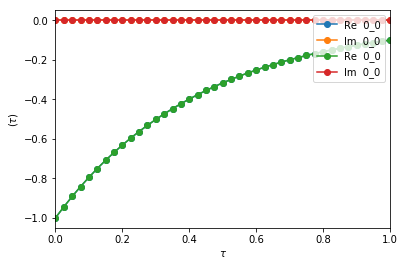

In [2]:
n_iw = 1000
beta = 50
pol = 2.3
def analy(n):
    return (pol)**(n) 

gw = GfImFreq(indices = [1], beta = beta, n_points = n_iw)
gw << inverse(iOmega_n - pol) #SemiCircular(half_bandwidth = 1)

omax = (2*n_iw + 1)*3.1416/beta/(2*pol)
print "omax", omax

gt = GfImTime(indices = [1], beta = beta, n_points = 2*n_iw + 2)
gt << InverseFourier(gw)

# EXACT
gt_ex = gt.copy()
for t in gt.mesh:
    gt_ex[t] = - exp (-pol * t)/(1  + exp (-beta * pol))

print "abs (gt - gt_exact) = ", abs((gt - gt_ex).data[0:5,0,0])

plt.xlim(0,1)
print len(gt.mesh)
oplot(gt, '-o')
oplot(gt_ex, '-o')

[ 0.00021323  0.00021294  0.00021265  0.00021236  0.00021208  0.00021179
  0.0002115   0.00021122  0.00021094  0.00021065]


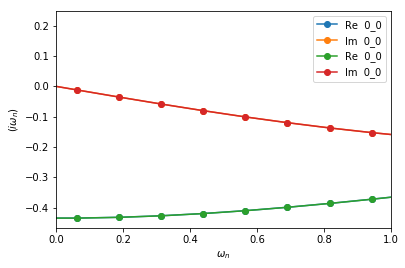

In [3]:
gw2 = gw.copy()
gw2 <<  Fourier(gt)

plt.xlim(0,1)
oplot(gw, '-o')
oplot(gw2, '-o')
print abs((gw - gw2).data[0:10,0,0])

Fit the tail for $G(\tau)$
==================

Illustrate the idea with the expansion around 0.

`NB : we need to also add the term at beta, except it is very small in this example.`

If $\tau_i$ are the points of the grid, with $\tau_i = i \beta/N$ with $N$ points, 
and we note $\epsilon = \beta/N$ : 

$$d_a \equiv \frac{g(\tau_a) - g(0)}{\tau_a} = \sum_{j=1}^p g^{(j)}(0) \dfrac{\tau_a^{j-1}}{j!} + O(\epsilon^p)$$

So 
$$\displaystyle \begin{pmatrix} d_p \\ \ldots \\d_1\end{pmatrix}  = V * \begin{pmatrix} g^{(j)}(0) \dfrac{\epsilon^{j-1}}{j!}\\ \ldots \\g^{(1)}(0)\end{pmatrix}$$
where $V$ is a $p\times p$ Vandermonde matrix
$$ V= Vandermonde(p, p-1, \ldots, 1) $$

If we make a $QR$ decomposition of $V = QR$ (where $Q$ is orthogonal and $R$ upper-triangular), 
we pass $Q$ on the left, and we can solve first for $g'(0)$ (with last eq), then $g''(0), g'''(0)$ and so on 
at order $O(\epsilon^{p-1})$, $O(\epsilon^{p-2})$ and $O(\epsilon^{p-3})$ and so on.


In [4]:
gt = GfImTime(indices = [1], beta = 50, n_points = 1000)
for t in gt.mesh:
    gt[t] = - exp (-pol * t)/(1  + exp (-beta * pol))

p = 10
p_range = range(p,0,-1) 
eps = list(gt.mesh)[1].value
print "eps = ", eps

Q, R = np.linalg.qr(np.vander(p_range))
dcol = np.array([(gt.data[i,0,0] - gt.data[0,0,0])/(i*eps) for i in p_range])
Gder = np.dot( np.linalg.inv(R), np.dot(Q.transpose(), dcol))[::-1]

moments = [ x/eps**(i)*math.factorial(i+1) *(-1)**i for i,x in enumerate(Gder)]

for i in range(min(5, p)):
    print i, moments[i].real, analy(i+1), abs(1- moments[i]/analy(i+1)) #, abs(moments[i] - analy(i+1)), abs(Gder[i]- analy(i+1)* eps**i/math.factorial(i)) 

eps =  0.0500500500501
0 2.29999999995 2.3 2.21436202708e-11
1 5.28999999402 5.29 1.13032150306e-09
2 12.166999568 12.167 3.55052856005e-08
3 27.9840770902 27.9841 8.18672806324e-07
4 64.3624917093 64.36343 1.45780099738e-05
